In [3]:
import pandas as pd

df = pd.read_csv("Processed_sunspot_dataset_without_missing_values.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)


/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 53468 (\N{HANGUL SYLLABLE TAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(by

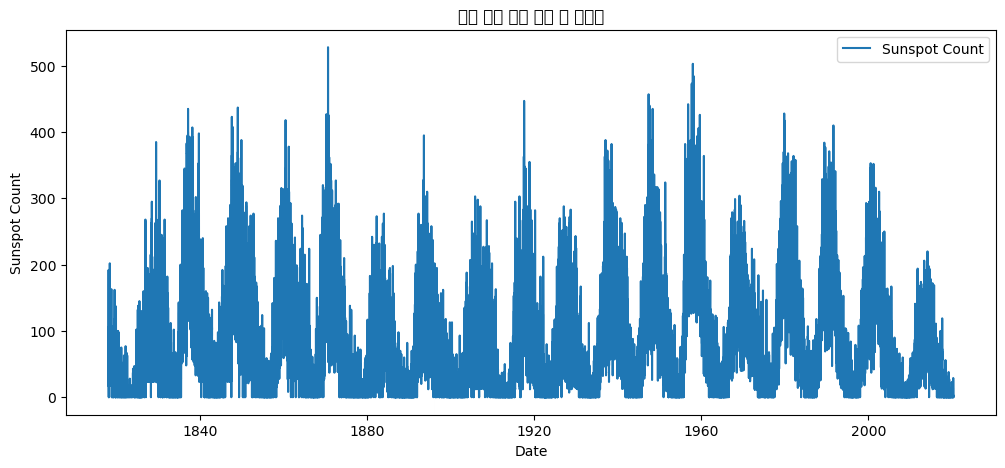

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(df.index, df['Sunspot_Count'], label='Sunspot Count')
plt.title("전체 기간 태양 흑점 수 시계열")
plt.xlabel("Date")
plt.ylabel("Sunspot Count")
plt.legend()
plt.show()


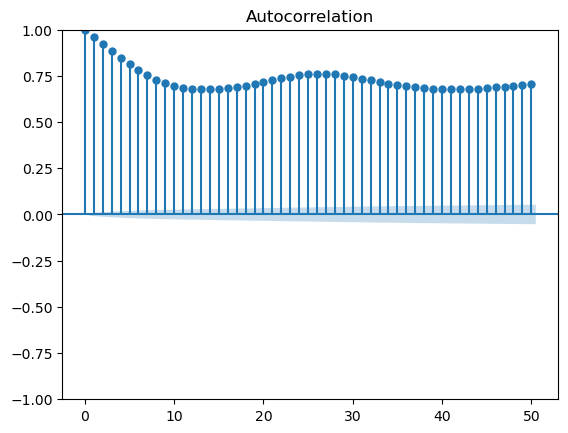

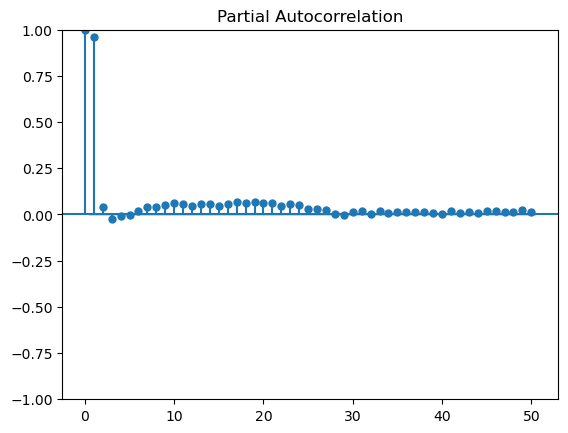

In [7]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df['Sunspot_Count'], lags=50)
plt.show()

plot_pacf(df['Sunspot_Count'], lags=50)
plt.show()


In [9]:
import itertools
import numpy as np
import statsmodels.api as sm
import time

p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))

best_aic = np.inf
best_order = None
best_model = None

start_time = time.time()
for order in pdq:
    try:
        model = sm.tsa.ARIMA(df['Sunspot_Count'], order=order)
        model_fit = model.fit()
        if model_fit.aic < best_aic:
            best_aic = model_fit.aic
            best_order = order
            best_model = model_fit
    except Exception as e:
        continue
end_time = time.time()
print(f"Best ARIMA order: {best_order} with AIC: {best_aic}")
print(f"ARIMA grid search 실행 시간: {end_time - start_time:.2f} 초")


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  

Best ARIMA order: (2, 1, 2) with AIC: 665421.7119516575
ARIMA grid search 실행 시간: 75.93 초


In [11]:
from sklearn.metrics import mean_squared_error
import math

# 예를 들어, 마지막 30일을 테스트 세트로 분리
train = df.iloc[:-30]
test = df.iloc[-30:]

model = sm.tsa.ARIMA(train['Sunspot_Count'], order=best_order)
model_fit = model.fit()
predictions = model_fit.forecast(steps=30)

rmse = math.sqrt(mean_squared_error(test['Sunspot_Count'], predictions))
print(f"Test RMSE: {rmse:.2f}")


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA par

Test RMSE: 3.33
